In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("#5_3.tsv",sep="\t",decimal=",",index_col=0,header=[0,1])
display(df)

Metric     Mean                                                          \
Class         0      1      2      3      4      5      6      7      8   
Train     0.977  0.919  0.917  0.836  0.245  0.348  0.477  0.573  0.783   
Same dom  0.971  0.907  0.899  0.816  0.168  0.308  0.492  0.403  0.772   
Diff dom  0.535  0.672  0.408  0.464  0.163  0.290  0.395  0.665  0.739   

Metric           ... wMean(10)                                            \
Class         9  ...         6      7      8      9     10     11     12   
Train     0.711  ...     0.405  0.449  0.762  0.694  0.930  0.398  0.352   
Same dom  0.631  ...     0.424  0.344  0.749  0.603  0.929  0.416  0.361   
Diff dom  0.561  ...     0.292  0.601  0.735  0.577  0.743  0.425  0.320   

Metric                         
Class        13     14     15  
Train     0.951  0.368  0.079  
Same dom  0.944  0.356  0.031  
Diff dom  0.891  0.132  0.000  

[3 rows x 128 columns]

Metric  InvFreq(0.1)  InvFreq(0.2)  InvFreq(0.3)   Mean  MeanPerClass  \
Class                                                                   
4              0.263         0.296         0.312  0.245         0.207   
5              0.369         0.386         0.397  0.348         0.241   
6              0.487         0.484         0.466  0.477         0.157   
7              0.552         0.551         0.460  0.573         0.143   
11             0.490         0.498         0.474  0.481         0.178   
12             0.423         0.416         0.408  0.419         0.205   
14             0.583         0.547         0.569  0.593         0.177   
15             0.278         0.284         0.285  0.266         0.090   

Metric  wMean(10)  wMean(2)  wMean(5)  
Class                                  
4           0.223     0.234     0.225  
5           0.283     0.390     0.363  
6           0.405     0.492     0.473  
7           0.449     0.561     0.489  
11          0.398     0.486     0.428  
12          0.352     0.421     0.376  
14          0.368     0.565     0.482  
15          0.079     0.193     0.105

Metric  InvFreq(0.1)  InvFreq(0.2)  InvFreq(0.3)   Mean  MeanPerClass  \
Class                                                                   
4              0.164         0.194         0.167  0.163         0.109   
5              0.268         0.285         0.276  0.290         0.176   
6              0.365         0.366         0.348  0.395         0.159   
7              0.625         0.694         0.640  0.665         0.233   
11             0.447         0.441         0.443  0.436         0.209   
12             0.317         0.308         0.317  0.286         0.187   
14             0.351         0.362         0.378  0.318         0.166   
15             0.053         0.190         0.078  0.042         0.138   

Metric  wMean(10)  wMean(2)  wMean(5)  
Class                                  
4           0.120     0.143     0.142  
5           0.192     0.270     0.287  
6           0.292     0.384     0.360  
7           0.601     0.667     0.621  
11          0.425     0.468     0.426  
12          0.320     0.343     0.305  
14          0.132     0.372     0.242  
15          0.000     0.030     0.005

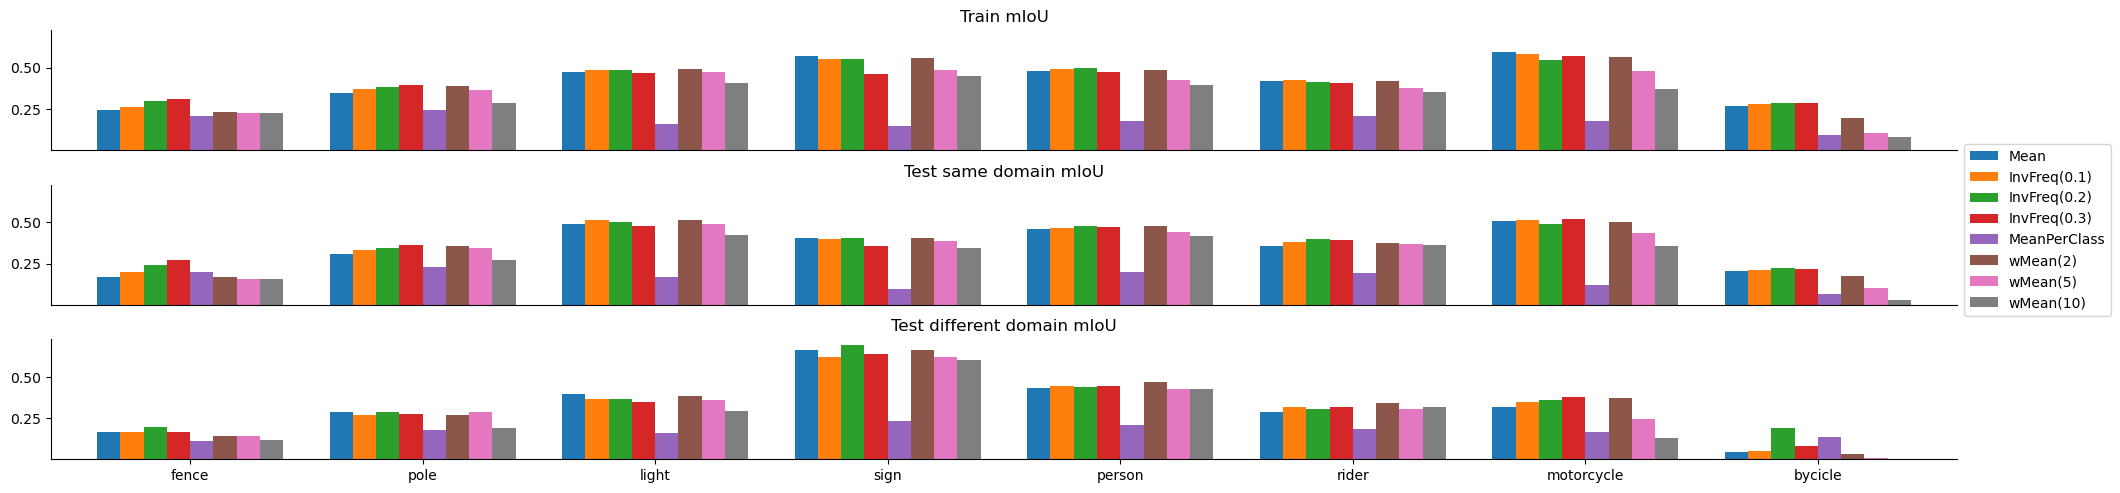

In [55]:

fig,ax=plt.subplots(3,1,figsize=(20,5),sharex=True,sharey=True)
fig.tight_layout(pad=1.5)
bars=np.array([0,1,2,3,4,5,6,7])
labels=['fence','pole','light','sign','person','rider','motorcycle','bycicle']
legends=['Mean','InvFreq(0.1)','InvFreq(0.2)','InvFreq(0.3)','MeanPerClass','wMean(2)','wMean(5)','wMean(10)']
indexes=[4,5,6,7,11,12,14,15]
#label=['MeanReduction()','MeanReductionPerClass()','MeanReductionInverseClassFrequency(0.1)','MeanReductionInverseClassFrequency(0.2)            ','MeanReductionInverseClassFrequency(0.3)','weightedMeanReduction(2)','weightedMeanReduction(5)','weightedMeanReduction(10)']
ax[0].tick_params(bottom=False)
ax[0].set_yticks([0.25,0.5,0.75])
ax[1].set_yticks([0.25,0.5,0.75])
ax[2].set_yticks([0.25,0.5,0.75])
ax[0].set_xlim((-0.6,7.6))
ax[1].tick_params(bottom=False)
ax[2].set_xticks(bars)
ax[2].set_xticklabels(labels)
ax[0].set_title("Train mIoU")
ax[1].set_title("Test same domain mIoU")
ax[2].set_title("Test different domain mIoU")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)


dfTrain=pd.to_numeric(df.loc['Train']).unstack(level=1).transpose()
dfTrain.index=dfTrain.index.map(int)
dfTrain=dfTrain.loc[indexes]
display(dfTrain)
for i in range(8):
    pdTrain=dfTrain[legends[i]].to_numpy()
    ax[0].bar(bars-0.35+0.1*i,pdTrain[:],width=0.1)

dfTrain=pd.to_numeric(df.loc['Same dom']).unstack(level=1).transpose()
dfTrain.index=dfTrain.index.map(int)
dfTrain=dfTrain.loc[indexes]
for i in range(8):
    pdTrain=dfTrain[legends[i]].to_numpy()
    ax[1].bar(bars-0.35+0.1*i,pdTrain[:],width=0.1,label=legends[i])

dfTrain=pd.to_numeric(df.loc['Diff dom']).unstack(level=1).transpose()
dfTrain.index=dfTrain.index.map(int)
dfTrain=dfTrain.loc[indexes]
display(dfTrain)
for i in range(8):
    pdTrain=dfTrain[legends[i]].to_numpy()
    ax[2].bar(bars-0.35+0.1*i,pdTrain[:],width=0.1)

ax[1].legend(bbox_to_anchor=(1, 1.4))
plt.savefig("miouLossesSmall.jpg",bbox_inches='tight',dpi=300)

Metric  InvFreq(0.1)  InvFreq(0.2)  InvFreq(0.3)   Mean  MeanPerClass  \
Class                                                                   
0              0.976         0.977         0.976  0.977         0.933   
1              0.916         0.919         0.916  0.919         0.817   
10             0.942         0.942         0.941  0.942         0.897   
11             0.490         0.498         0.474  0.481         0.178   
12             0.423         0.416         0.408  0.419         0.205   
13             0.954         0.955         0.954  0.953         0.903   
14             0.583         0.547         0.569  0.593         0.177   
15             0.278         0.284         0.285  0.266         0.090   
2              0.918         0.917         0.915  0.917         0.786   
3              0.833         0.839         0.828  0.836         0.641   
4              0.263         0.296         0.312  0.245         0.207   
5              0.369         0.386         0.397  0.348         0.241   
6              0.487         0.484         0.466  0.477         0.157   
7              0.552         0.551         0.460  0.573         0.143   
8              0.783         0.784         0.781  0.783         0.646   
9              0.719         0.726         0.723  0.711         0.508   

Metric  wMean(10)  wMean(2)  wMean(5)  
Class                                  
0           0.975     0.976     0.976  
1           0.902     0.917     0.913  
10          0.930     0.942     0.938  
11          0.398     0.486     0.428  
12          0.352     0.421     0.376  
13          0.951     0.952     0.954  
14          0.368     0.565     0.482  
15          0.079     0.193     0.105  
2           0.883     0.916     0.909  
3           0.813     0.834     0.830  
4           0.223     0.234     0.225  
5           0.283     0.390     0.363  
6           0.405     0.492     0.473  
7           0.449     0.561     0.489  
8           0.762     0.781     0.774  
9           0.694     0.714     0.708

Metric  InvFreq(0.1)  InvFreq(0.2)  InvFreq(0.3)   Mean  MeanPerClass  \
Class                                                                   
0              0.971         0.972         0.972  0.971         0.928   
1              0.905         0.907         0.908  0.907         0.812   
10             0.942         0.941         0.940  0.941         0.893   
11             0.469         0.480         0.472  0.459         0.198   
12             0.378         0.400         0.396  0.359         0.195   
13             0.946         0.947         0.946  0.946         0.888   
14             0.517         0.489         0.521  0.506         0.119   
15             0.212         0.223         0.216  0.205         0.065   
2              0.901         0.899         0.898  0.899         0.768   
3              0.813         0.823         0.821  0.816         0.623   
4              0.198         0.243         0.269  0.168         0.198   
5              0.331         0.342         0.364  0.308         0.230   
6              0.516         0.500         0.477  0.492         0.168   
7              0.402         0.403         0.355  0.403         0.097   
8              0.775         0.775         0.774  0.772         0.656   
9              0.649         0.645         0.643  0.631         0.465   

Metric  wMean(10)  wMean(2)  wMean(5)  
Class                                  
0           0.971     0.971     0.971  
1           0.894     0.906     0.902  
10          0.929     0.941     0.937  
11          0.416     0.481     0.440  
12          0.361     0.377     0.369  
13          0.944     0.944     0.946  
14          0.356     0.502     0.434  
15          0.031     0.176     0.101  
2           0.867     0.897     0.892  
3           0.792     0.807     0.806  
4           0.158     0.165     0.154  
5           0.271     0.357     0.342  
6           0.424     0.515     0.488  
7           0.344     0.404     0.385  
8           0.749     0.772     0.767  
9           0.603     0.641     0.641

Metric  InvFreq(0.1)  InvFreq(0.2)  InvFreq(0.3)   Mean  MeanPerClass  \
Class                                                                   
0              0.689         0.710         0.752  0.535         0.699   
1              0.713         0.677         0.674  0.672         0.614   
10             0.777         0.795         0.836  0.541         0.584   
11             0.447         0.441         0.443  0.436         0.209   
12             0.317         0.308         0.317  0.286         0.187   
13             0.912         0.917         0.904  0.900         0.827   
14             0.351         0.362         0.378  0.318         0.166   
15             0.053         0.190         0.078  0.042         0.138   
2              0.535         0.587         0.637  0.408         0.466   
3              0.538         0.367         0.453  0.464         0.386   
4              0.164         0.194         0.167  0.163         0.109   
5              0.268         0.285         0.276  0.290         0.176   
6              0.365         0.366         0.348  0.395         0.159   
7              0.625         0.694         0.640  0.665         0.233   
8              0.757         0.763         0.752  0.739         0.656   
9              0.580         0.588         0.597  0.561         0.449   

Metric  wMean(10)  wMean(2)  wMean(5)  
Class                                  
0           0.653     0.808     0.705  
1           0.646     0.682     0.664  
10          0.743     0.740     0.753  
11          0.425     0.468     0.426  
12          0.320     0.343     0.305  
13          0.891     0.914     0.906  
14          0.132     0.372     0.242  
15          0.000     0.030     0.005  
2           0.490     0.600     0.540  
3           0.427     0.529     0.472  
4           0.120     0.143     0.142  
5           0.192     0.270     0.287  
6           0.292     0.384     0.360  
7           0.601     0.667     0.621  
8           0.735     0.742     0.731  
9           0.577     0.615     0.577

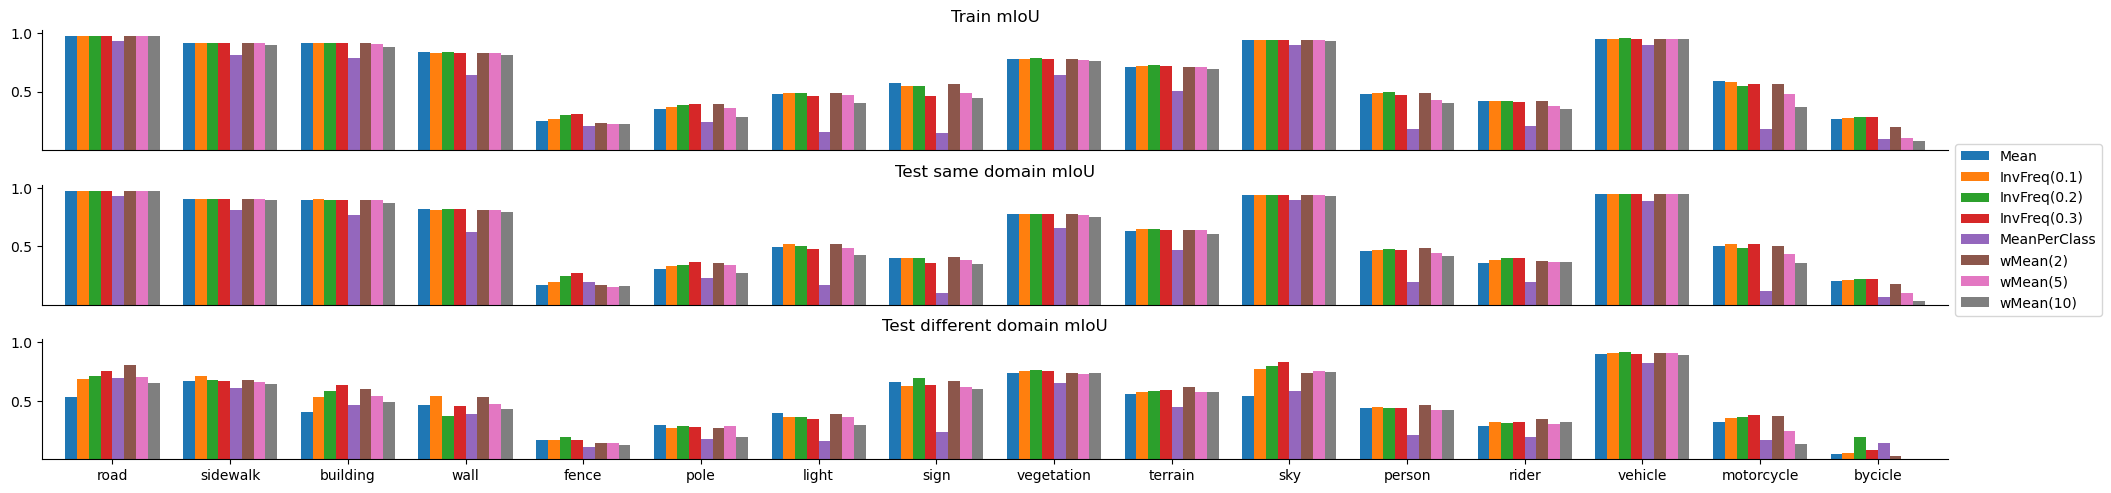

In [45]:
fig,ax=plt.subplots(3,1,figsize=(20,5),sharex=True,sharey=True)
fig.tight_layout(pad=1.5)
labels=['road','sidewalk','building','wall','fence','pole','light','sign','vegetation','terrain','sky','person','rider','vehicle','motorcycle','bycicle']
legends=['Mean','InvFreq(0.1)','InvFreq(0.2)','InvFreq(0.3)','MeanPerClass','wMean(2)','wMean(5)','wMean(10)']
#label=['MeanReduction()','MeanReductionPerClass()','MeanReductionInverseClassFrequency(0.1)','MeanReductionInverseClassFrequency(0.2)            ','MeanReductionInverseClassFrequency(0.3)','weightedMeanReduction(2)','weightedMeanReduction(5)','weightedMeanReduction(10)']
ax[0].tick_params(bottom=False)
ax[0].set_yticks([0.5,1])
ax[1].set_yticks([0.5,1])
ax[2].set_yticks([0.5,1])
ax[0].set_xlim((-0.6,15.6))
ax[1].tick_params(bottom=False)
ax[2].set_xticks(bars)
ax[2].set_xticklabels(labels)
ax[0].set_title("Train mIoU")
ax[1].set_title("Test same domain mIoU")
ax[2].set_title("Test different domain mIoU")
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)


dfTrain=pd.to_numeric(df.loc['Train']).unstack(level=1).transpose()
#dfTrain=dfTrain.astype({"Class":"int"})
dfTrain.index=dfTrain.index.map(int)
display(dfTrain)

for i in range(8):
    pdTrain=dfTrain[legends[i]].to_numpy()
    ax[0].bar(dfTrain.index-0.35+0.1*i,pdTrain[:],width=0.1)

dfTrain=pd.to_numeric(df.loc['Same dom']).unstack(level=1).transpose()
dfTrain.index=dfTrain.index.map(int)
display(dfTrain)
for i in range(8):
    pdTrain=dfTrain[legends[i]].to_numpy()
    ax[1].bar(dfTrain.index-0.35+0.1*i,pdTrain[:],width=0.1,label=legends[i])

dfTrain=pd.to_numeric(df.loc['Diff dom']).unstack(level=1).transpose()
dfTrain.index=dfTrain.index.map(int)
display(dfTrain)
for i in range(8):
    pdTrain=dfTrain[legends[i]].to_numpy()
    ax[2].bar(dfTrain.index-0.35+0.1*i,pdTrain[:],width=0.1)

ax[1].legend(bbox_to_anchor=(1, 1.4))
plt.savefig("miouLosses.jpg",bbox_inches='tight',dpi=300)

<Figure size 640x480 with 0 Axes>

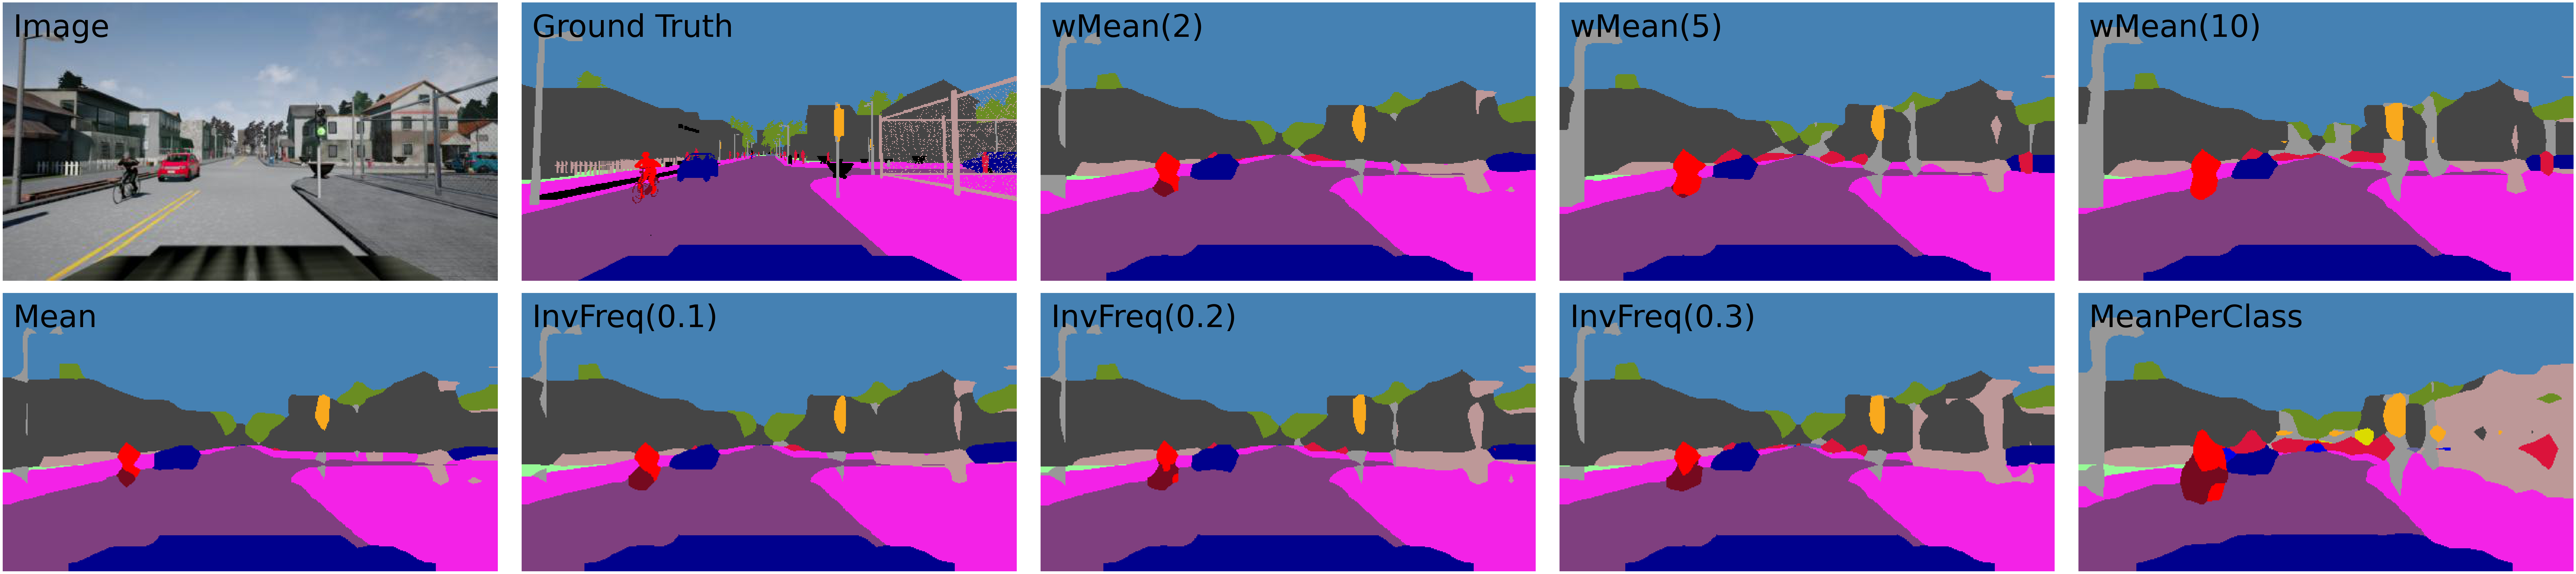

<Figure size 640x480 with 0 Axes>

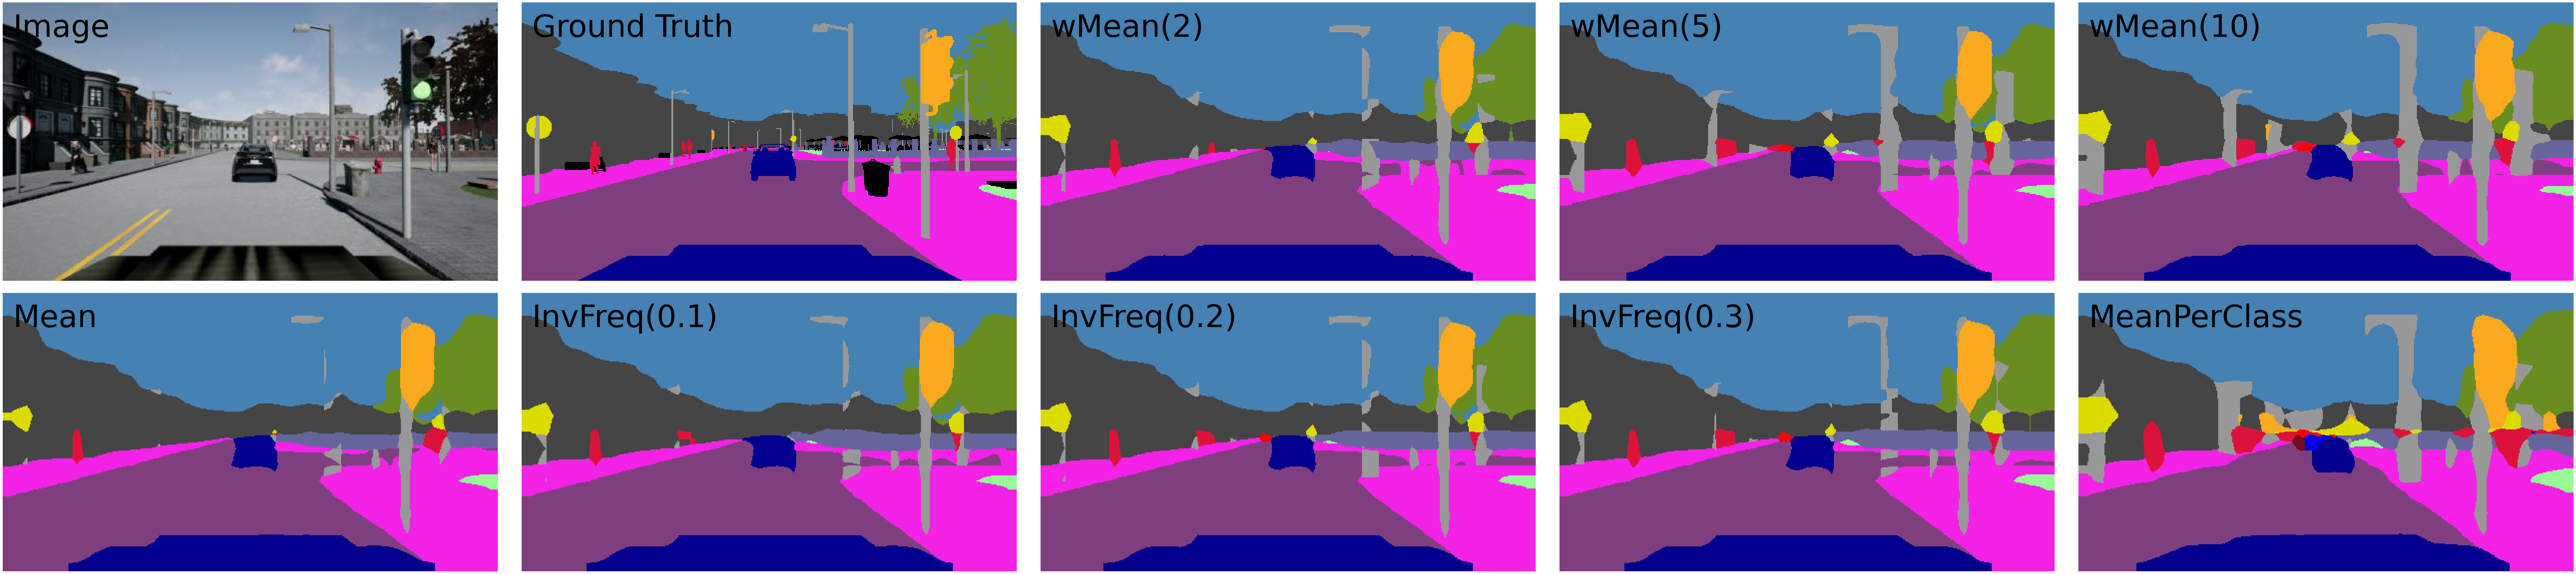

<Figure size 640x480 with 0 Axes>

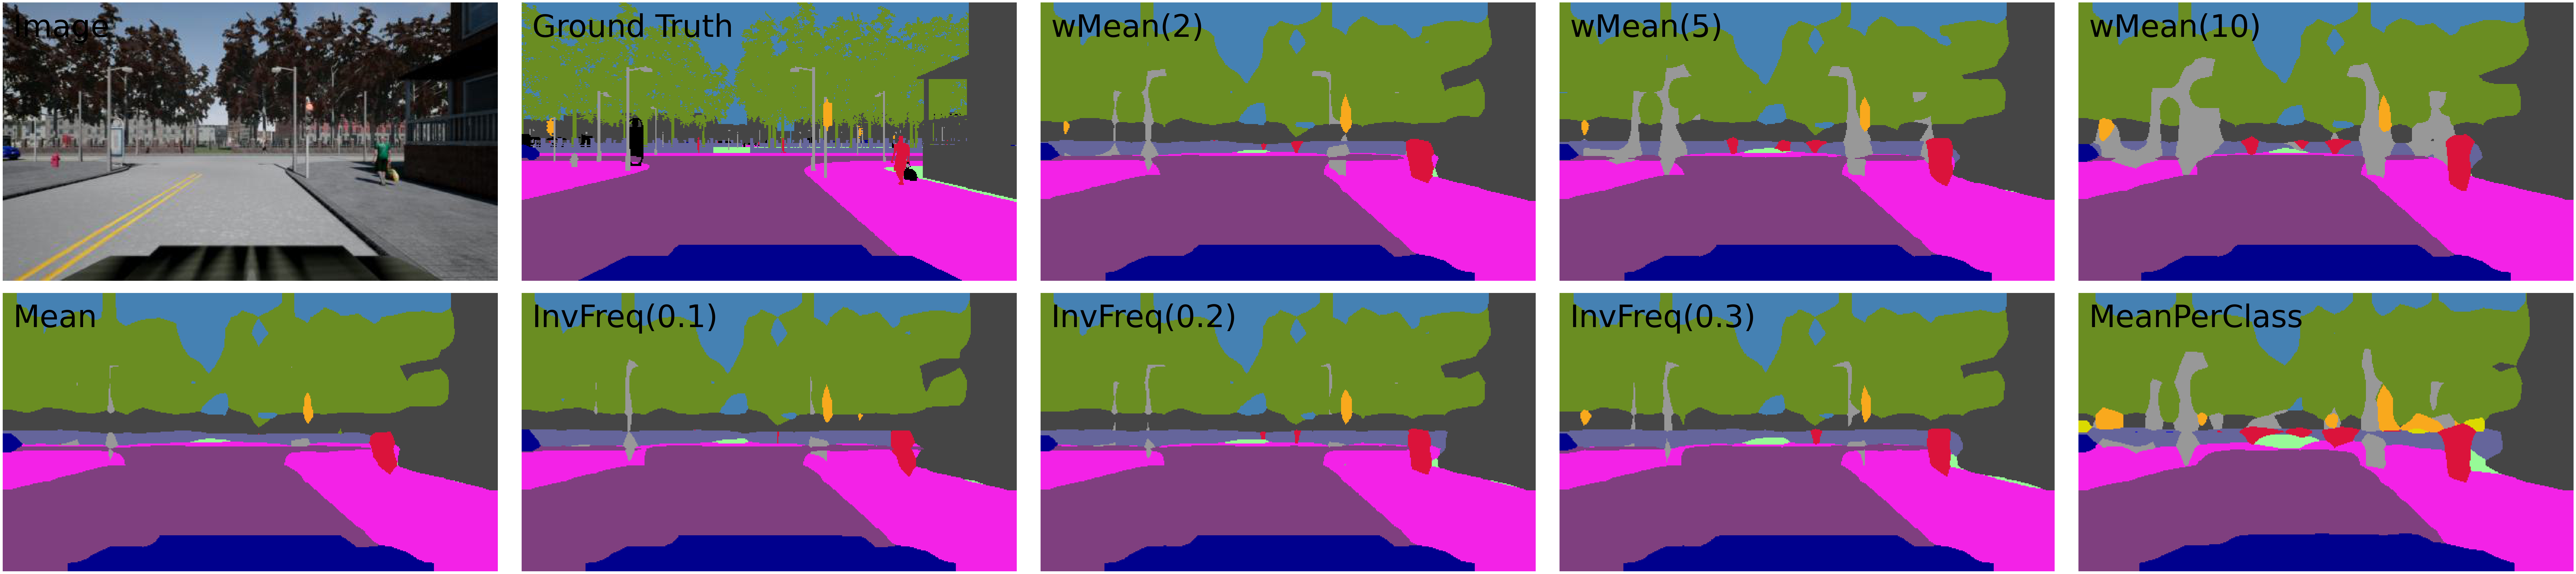

<Figure size 640x480 with 0 Axes>

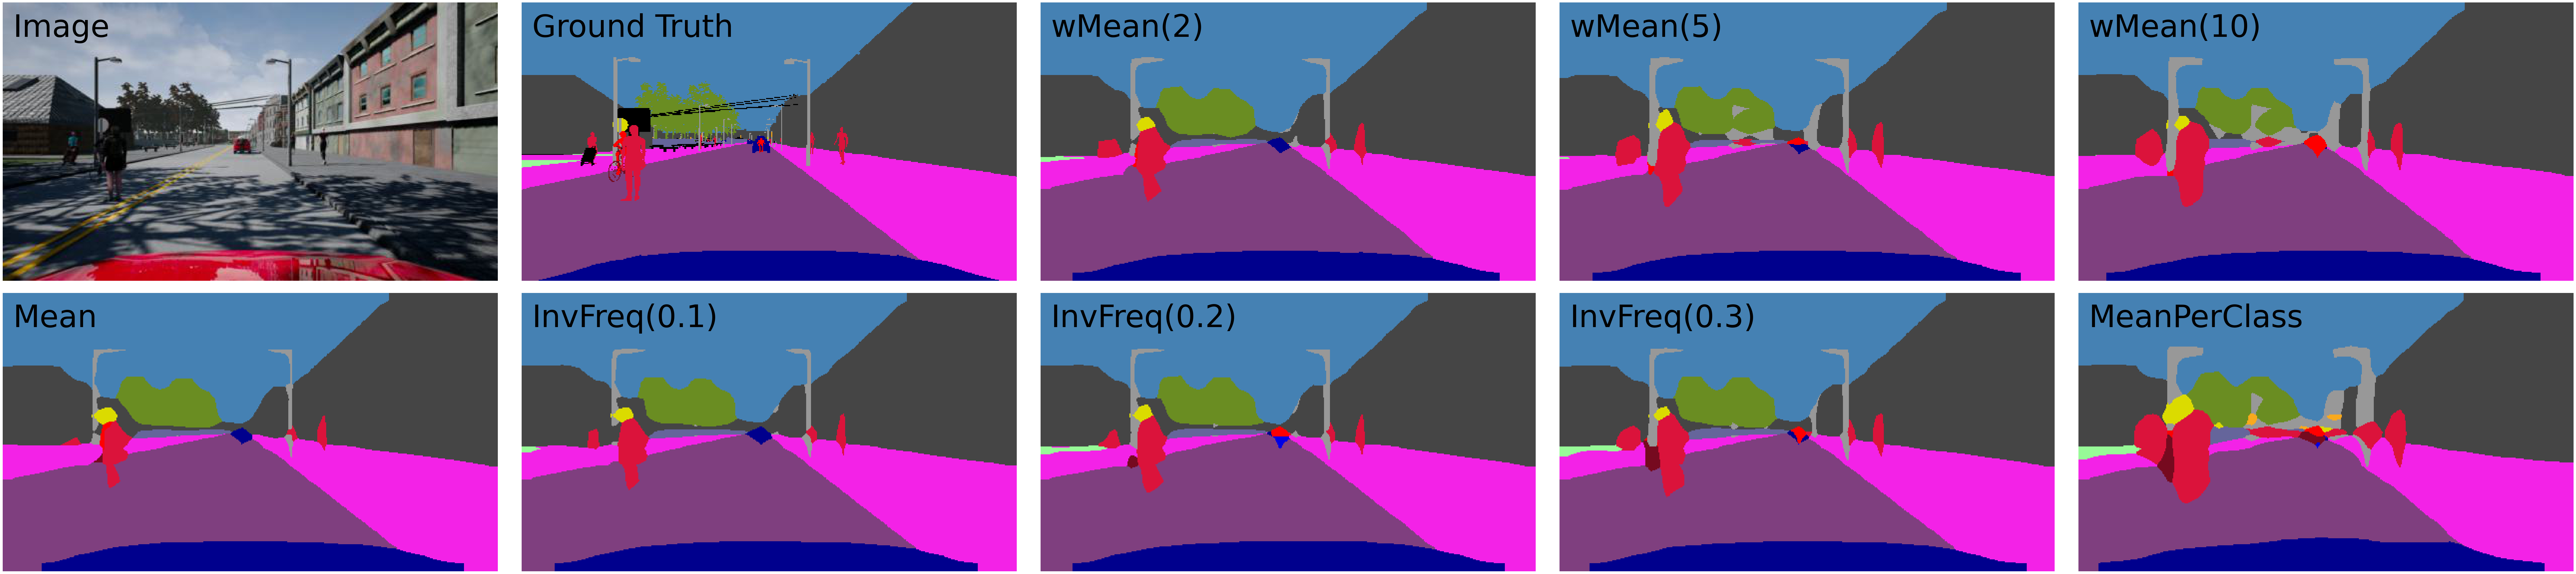

In [152]:
from PIL import Image
for c in ['396_T02_CN_J','3099_T02_CN_J','7595_T02_CN_J','12015_T02_CN_A']:
    a=['img','gt','Weighted_2','Weighted_5','Weighted_10','Mean','InvFreq_0_1','InvFreq_0_2','InvFreq_0_3','MeanClass']
    labels=['Image','Ground Truth','wMean(2)','wMean(5)','wMean(10)','Mean','InvFreq(0.1)','InvFreq(0.2)','InvFreq(0.3)','MeanPerClass']
    plt.figure()
    fig,ax=plt.subplots(2,5,figsize=(1920*5/100,1080*2/100))
    fig.tight_layout()
    for i in range(10):
        img = np.asarray(Image.open('Pictures/'+c+'/'+a[i]+('.png'if a[i]!='img' else '.jpeg')))
        ax[int(i/5),(i%5)].imshow(img,interpolation='none')
        ax[int(i/5),(i%5)].axis('off')
        ax[int(i/5),(i%5)].text(10, 10, labels[i],fontsize=82,horizontalalignment='left',verticalalignment='top')

    #img = np.asarray(Image.open('Pictures/'+c+'/img.jpeg'))
    #ax[3,1].imshow(img)

    #ax[3,0].axis('off')
    #ax[3,1].axis('off')
    #ax[3,2].set_axis_off()
    #for k in range(9):
    #    i=8-k
    #    ax[3,2].text(0.25, 0.1*k+0.15, str(i)+" - "+labels[i],fontsize=72,horizontalalignment='left',verticalalignment='top')
    plt.savefig(('Pictures/'+c+"recap_5by2"),bbox_inches='tight',dpi=300)

c:\Users\ollob\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


['T02_CN_A_U1', 'T02_CN_A_U2', 'T03_CS_A_U1', 'T03_CS_A_U2', 'T01_CN_J_U1', 'T01_CN_J_U2', 'T01_CS_J_U1', 'T01_CS_J_U2', 'T03_CN_A_U1', 'T03_CN_A_U2', 'T02_CS_A_U1', 'T02_CS_A_U2', 'T03_CS_J_U1', 'T03_CS_J_U2', 'T01_CN_A_U1', 'T01_CN_A_U2', 'T02_CN_J_U1', 'T02_CN_J_U2', 'T02_CS_J_U1', 'T02_CS_J_U2', 'T01_CS_A_U1', 'T01_CS_A_U2', 'T03_CN_J_U1', 'T03_CN_J_U2']
['T03_HRN_J', 'T02_HRN_J', 'T01_HRN_J', 'T02_HRN_A', 'T03_HRN_A', 'T01_HRN_A', 'T02_CN_A', 'T03_CS_A', 'T01_CN_J', 'T01_CS_J', 'T03_CN_A', 'T02_CS_A', 'T03_CS_J', 'T01_CN_A', 'T02_CN_J', 'T02_CS_J', 'T01_CS_A', 'T03_CN_J']


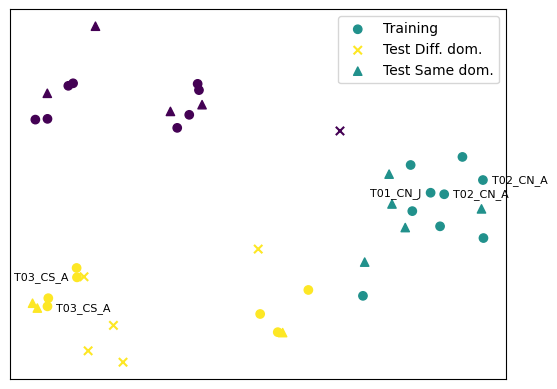

In [97]:
import json
from utils.cluster import createClusters,createClustersData
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
f=open("data/idda/clients_styles.json")
training_clients,training_data,test_clients,test_data=createClustersData(FDAwindow=3)
clusters=createClusters([3],FDAwindow=3)
data=np.zeros((len(training_clients)+len(test_clients),3*3*2))
labels=np.zeros(len(training_clients)+len(test_clients),dtype=np.uint16)
data[:len(training_clients),:]=training_data
data[len(training_clients):,:]=test_data
c=0
for client in training_clients:
    labels[c]=clusters[client]
    c+=1
for client in test_clients:
    labels[c]=clusters[client]
    c+=1

pca=PCA(2)
dataPCA=pca.fit_transform(data)


['T02_CN_A_U1', 'T02_CN_A_U2', 'T03_CS_A_U1', 'T03_CS_A_U2', 'T01_CN_J_U1', 'T01_CN_J_U2', 'T01_CS_J_U1', 'T01_CS_J_U2', 'T03_CN_A_U1', 'T03_CN_A_U2', 'T02_CS_A_U1', 'T02_CS_A_U2', 'T03_CS_J_U1', 'T03_CS_J_U2', 'T01_CN_A_U1', 'T01_CN_A_U2', 'T02_CN_J_U1', 'T02_CN_J_U2', 'T02_CS_J_U1', 'T02_CS_J_U2', 'T01_CS_A_U1', 'T01_CS_A_U2', 'T03_CN_J_U1', 'T03_CN_J_U2']
['T03_HRN_J', 'T02_HRN_J', 'T01_HRN_J', 'T02_HRN_A', 'T03_HRN_A', 'T01_HRN_A', 'T02_CN_A', 'T03_CS_A', 'T01_CN_J', 'T01_CS_J', 'T03_CN_A', 'T02_CS_A', 'T03_CS_J', 'T01_CN_A', 'T02_CN_J', 'T02_CS_J', 'T01_CS_A', 'T03_CN_J']


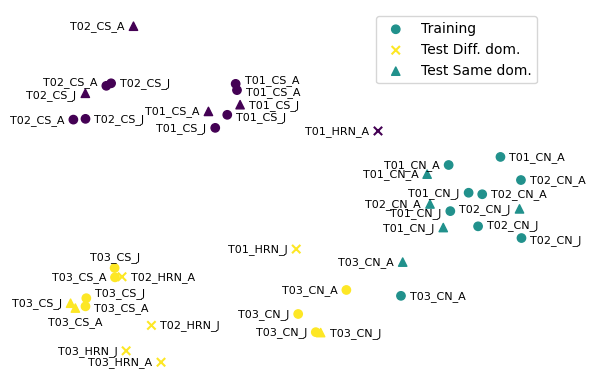

In [181]:
print(training_clients)
print(test_clients)
plt.figure()
plt.scatter(dataPCA[:len(training_clients),0],dataPCA[:len(training_clients),1],c=labels[:len(training_clients)],label='Training')
plt.scatter(dataPCA[len(training_clients):len(training_clients)+6,0],dataPCA[len(training_clients):len(training_clients)+6,1],c=labels[len(training_clients):len(training_clients)+6],marker='x',label='Test Diff. dom.')
plt.scatter(dataPCA[len(training_clients)+6:,0],dataPCA[len(training_clients)+6:,1],c=labels[len(training_clients)+6:],marker='^',label='Test Same dom.')
plt.tick_params(left=False,bottom=False,labelbottom=False,labelleft=False)
plt.legend()
c=0
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]-500],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]-500],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]-500],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]+1000],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0],dataPCA[c,1]+1500],horizontalalignment='center',verticalalignment='bottom',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]+1500],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]+500],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]-500],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]-500],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]+4000,dataPCA[c,1]+1000],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(training_clients[c][:-3],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0],dataPCA[c,1]-4000],horizontalalignment='center',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]-500],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]-4000,dataPCA[c,1]],horizontalalignment='right',verticalalignment='center',size=8)
c+=1
plt.annotate(test_clients[c-len(training_clients)],[dataPCA[c,0]+4000,dataPCA[c,1]],horizontalalignment='left',verticalalignment='center',size=8)
c+=1
plt.axis('off')
plt.savefig("clusteringFDA3withlab",dpi=300,bbox_inches='tight')

plt.show()

In [ ]:

def extractMeansVarDictionary(root='data/idda/'):
    styles={}
    for fileName in 'train.txt':
                img=Image.open(root+'images/'+im+'.jpg')
                if a is None:
                    a=np.asarray(img)
                    a=a[:,:,np.newaxis,:]/255
                else:
                    c=np.asarray(img)
                    c=c[:,:,np.newaxis,:]/255
                    a=np.concatenate((a,c),2)
            print(key)
            styles[key]['mean']=np.mean(a,(0,1,2)).tolist()
            styles[key]['variance']=np.var(a,(0,1,2)).tolist()
        f.close()
    return styles

In [13]:
import numpy as np
from PIL import Image
class_eval = [255, 2, 4, 255, 11, 5, 0, 0, 1, 8, 13, 3, 7, 6, 255, 255, 15, 14, 12, 9, 10]
f = open("data/idda/train.txt", "r") 
samples_from_file=[x for x in f.read().split('\n') if x != '']
dict={}
for i in range(24):
    dict[i]=0
for img in samples_from_file:
    a=np.asarray(Image.open('data/idda/labels/'+img+'.png'))
    unique, counts = np.unique(a, return_counts=True)
    for i in range(len(unique)):
        dict[unique[i]]+=counts[i]
print(dict)

{0: 1671266, 1: 196739242, 2: 6285048, 3: 10926493, 4: 1566904, 5: 11354921, 6: 15527808, 7: 308570375, 8: 112733741, 9: 96078626, 10: 112141954, 11: 24179557, 12: 377654, 13: 1622960, 14: 1550150, 15: 1229547, 16: 178868, 17: 402573, 18: 580029, 19: 14561695, 20: 309649923, 21: 15589994, 22: 67509, 23: 573163}


In [14]:
final={}
for i in range(16):
    final[i]=0
final[255]=0

for i in range(len(dict)):
    if i<len(class_eval):
        final[class_eval[i]]+=dict[i] 
    else:
        final[255]+=dict[i]


In [16]:
frequ=[]
for i in range(16):
    frequ.append(final[i])
frequ.append(final[255])

[14.85  6.85 13.85 11.85 10.85  5.85  3.85  4.85  8.85  2.85 15.85  7.85
 12.85  0.85  1.85  9.85 -0.15]


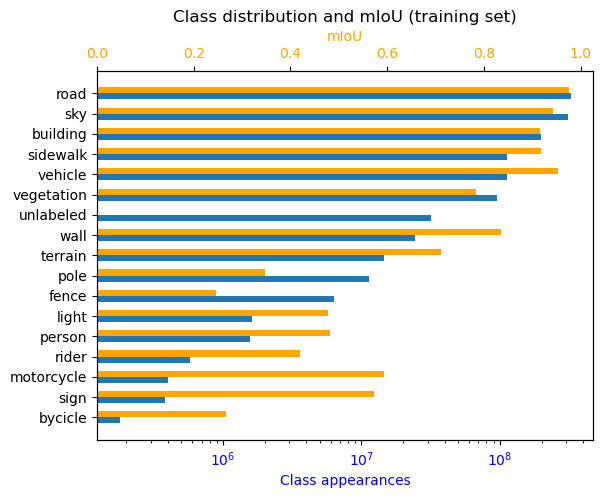

In [144]:
import matplotlib.pyplot as plt

mIoU=[0.977,0.919,0.917,0.836,0.245,0.348,0.477,0.573,0.783,0.711,0.942,0.481,0.419,0.953,0.593,0.266,0]
labels=['road','sidewalk','building','wall','fence','pole','light','sign','vegetation','terrain','sky','person','rider','vehicle','motorcycle','bycicle','unlabeled']
ind=sorted(range(len(frequ)), key=lambda k: frequ[k])
sortedMiOu=[]
sortedFrequ=[]
sortedNames=[]
for i in range(17):
    sortedMiOu.append(mIoU[ind[i]])
    sortedFrequ.append(frequ[ind[i]])
    sortedNames.append(labels[ind[i]])
print(np.array(ind)-0.15)

fig, ax=plt.subplots()
ax.barh(np.linspace(0,16,17)-0.15,sortedFrequ,log=True,height=0.3)
ax.tick_params(axis='x',labelcolor='blue')
ax.set_xlabel('Class appearances',color='blue')
ax2=ax.twiny()
ax2.barh(np.linspace(0,16,17)+0.15,sortedMiOu,height=0.3,color='orange')
ax2.tick_params(axis='x', labelcolor='orange')
ax2.set_xlabel('mIoU',color='orange')
ax.set_yticks(range(17))
ax.set_yticklabels(sortedNames)
plt.title("Class distribution and mIoU (training set)")
plt.savefig('dist_mIoU_sorted',dpi=300,bbox_inches='tight')


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df2=pd.read_csv("Step2 tsvs/2_for_images - 2 clients.tsv",sep="\t",decimal=",",index_col=0,header=[0,1,2])
df4=pd.read_csv("Step2 tsvs/2_for_images - 4 clients.tsv",sep="\t",decimal=",",index_col=0,header=[0,1,2])
df8=pd.read_csv("Step2 tsvs/2_for_images - 8 clients.tsv",sep="\t",decimal=",",index_col=0,header=[0,1,2])
df16=pd.read_csv("Step2 tsvs/2_for_images - 16 clients.tsv",sep="\t",decimal=",",index_col=0,header=[0,1,2])
df24=pd.read_csv("Step2 tsvs/2_for_images - 24 clients.tsv",sep="\t",decimal=",",index_col=0,header=[0,1,2])
print(df2.columns)
display(df2)

MultiIndex([('2',  '1',            'round'),
            ('2',  '1',     'mIoU (train)'),
            ('2',  '1', 'mIoU (test same)'),
            ('2',  '1', 'mIoU (test diff)'),
            ('2',  '3',            'round'),
            ('2',  '3',     'mIoU (train)'),
            ('2',  '3', 'mIoU (test same)'),
            ('2',  '3', 'mIoU (test diff)'),
            ('2',  '6',            'round'),
            ('2',  '6',     'mIoU (train)'),
            ('2',  '6', 'mIoU (test same)'),
            ('2',  '6', 'mIoU (test diff)'),
            ('2', '10',            'round'),
            ('2', '10',     'mIoU (train)'),
            ('2', '10', 'mIoU (test same)'),
            ('2', '10', 'mIoU (test diff)'),
            ('2', '15',            'round'),
            ('2', '15',     'mIoU (train)'),
            ('2', '15', 'mIoU (test same)'),
            ('2', '15', 'mIoU (test diff)'),
            ('2', '24',            'round'),
            ('2', '24',     'mIoU (train)'),
          

clients per round     2                                                       \
local epochs          1                                                    3   
                  round mIoU (train) mIoU (test same) mIoU (test diff) round   
1                   120      0.38749          0.39889          0.30494    40   
2                   240      0.47227          0.46801          0.38232    80   
3                   360      0.53224          0.49836          0.45674   120   
4                   480      0.41661          0.39370          0.33081   160   
5                   600      0.56052          0.53129          0.44456   200   
6                   720      0.55061          0.52366          0.42019   240   
7                   840      0.56637          0.52647          0.43113   280   
8                   960      0.56077          0.52194          0.42184   320   
9                  1080      0.59586          0.55360          0.44129   360   
10                 1200      0.57555          0.54805          0.41886   400   
11                 1320      0.58419          0.54830          0.44640   440   
12                 1440      0.58982          0.55881          0.43080   480   
13                 1560      0.60108          0.56488          0.46486   520   
14                 1680      0.60141          0.56864          0.45877   560   
15                 1800      0.61454          0.57155          0.46477   600   
16                 1920      0.59616          0.56295          0.44359   640   
17                 2040      0.61679          0.57511          0.47996   680   
18                 2160      0.60510          0.56822          0.43842   720   
19                 2280      0.61868          0.57970          0.47587   760   
20                 2400      0.61494          0.57953          0.46331   800   

clients per round                                                       \
local epochs                                                         6   
                  mIoU (train) mIoU (test same) mIoU (test diff) round   
1                      0.37468          0.38469          0.27963    20   
2                      0.45056          0.45386          0.35974    40   
3                      0.48090          0.46903          0.37747    60   
4                      0.50523          0.48766          0.39478    80   
5                      0.51963          0.49789          0.38702   100   
6                      0.57913          0.53980          0.44538   120   
7                      0.57146          0.52534          0.41332   140   
8                      0.58817          0.54191          0.44783   160   
9                      0.56915          0.52644          0.43009   180   
10                     0.59899          0.56702          0.46184   200   
11                     0.60179          0.57436          0.45907   220   
12                     0.60742          0.57611          0.46285   240   
13                     0.58318          0.55098          0.45439   260   
14                     0.61079          0.57458          0.47546   280   
15                     0.58475          0.54284          0.44235   300   
16                     0.60209          0.57562          0.45026   320   
17                     0.61662          0.58363          0.46631   340   
18                     0.59633          0.57158          0.42099   360   
19                     0.61054          0.57356          0.47536   380   
20                     0.58382          0.54587          0.43642   400   

clients per round               ...                                          \
local epochs                    ...               10                     15   
                  mIoU (train)  ... mIoU (test same) mIoU (test diff) round   
1                      0.37111  ...          0.40861          0.32607     8   
2                      0.45721  ...          0.46671          0.35474    16   
3                      0.50837  ...          0.49154         

C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2628403327.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df2.loc[:,('2','1')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2628403327.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df2.loc[:,('2','3')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2628403327.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df2.loc[:,('2','6')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2628403327.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df2.loc[:,('2','10')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2628403327.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df4.loc[:,('4','1')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2628403327.py:24: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_t

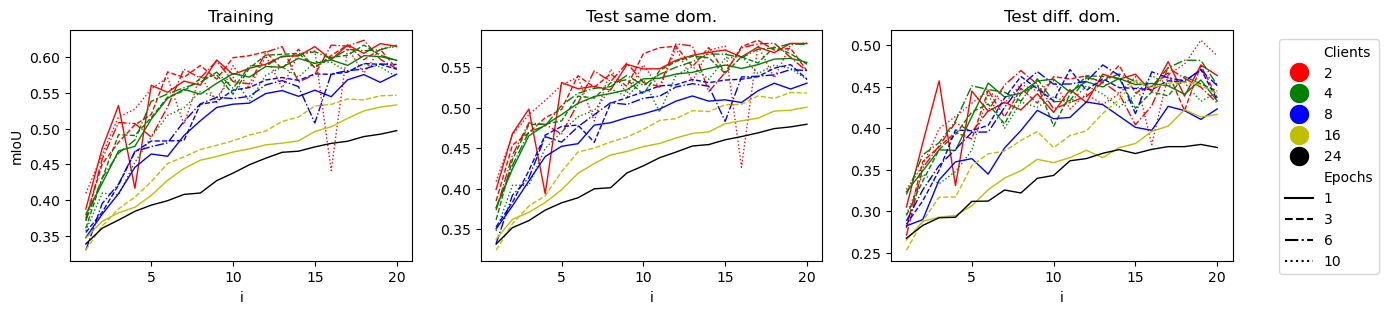

<Figure size 640x480 with 0 Axes>

In [109]:
fig,axs=plt.subplots(1,3,figsize=(15,3))
w=1
df_temp=df2.loc[:,('2','1')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],linewidth=w,c='r')
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],linewidth=w,c='r')
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],linewidth=w,c='r')
df_temp=df2.loc[:,('2','3')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'r--',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'r--',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'r--',linewidth=w)
df_temp=df2.loc[:,('2','6')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'r-.',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'r-.',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'r-.',linewidth=w)
df_temp=df2.loc[:,('2','10')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'r:',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'r:',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'r:',linewidth=w)

df_temp=df4.loc[:,('4','1')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'g-',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'g-',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'g-',linewidth=w)
df_temp=df4.loc[:,('4','3')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'g--',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'g--',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'g--',linewidth=w)
df_temp=df4.loc[:,('4','6')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'g-.',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'g-.',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'g-.',linewidth=w)
df_temp=df4.loc[:,('4','10')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'g:',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'g:',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'g:',linewidth=w)


df_temp=df8.loc[:,('8','1')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'b',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'b',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'b',linewidth=w)
df_temp=df8.loc[:,('8','3')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'b--',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'b--',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'b--',linewidth=w)
df_temp=df8.loc[:,('8','6')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'b-.',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'b-.',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'b-.',linewidth=w)

df_temp=df16.loc[:,('16','1')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'y',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'y',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'y',linewidth=w)
df_temp=df16.loc[:,('16','3')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'y--',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'y--',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'y--',linewidth=w)

df_temp=df24.loc[:,('24','1')]
axs[0].plot(range(1,21),df_temp['mIoU (train)'],'k',linewidth=w)
axs[1].plot(range(1,21),df_temp['mIoU (test same)'],'k',linewidth=w)
axs[2].plot(range(1,21),df_temp['mIoU (test diff)'],'k',linewidth=w)



from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.figure()
legend_elements = [Patch(visible=False,label='Clients'),
                    Line2D([0], [0], marker='o',markerfacecolor='r',color='w',  label='2',markersize=15),
                   Line2D([0], [0], marker='o',markerfacecolor='g',color='w',  label='4',markersize=15),
                   Line2D([0], [0], marker='o',markerfacecolor='b',color='w',  label='8',markersize=15),
                   Line2D([0], [0], marker='o',markerfacecolor='y',color='w',  label='16',markersize=15),
                   Line2D([0], [0], marker='o',markerfacecolor='k',color='w',  label='24',markersize=15),
                   Patch(visible=False,label='Epochs'),
                   Line2D([0], [0], color='k',linestyle='-', lw=1.5, label='1'),
                   Line2D([0], [0], color='k',linestyle='--', lw=1.5, label='3'),
                   Line2D([0], [0], color='k',linestyle='-.', lw=1.5,label='6'),
                   Line2D([0], [0], color='k',linestyle=':', lw=1.5, label='10')
                   ]

fig.legend(handles=legend_elements, loc='outside right')
axs[0].set_ylabel('mIoU')
axs[0].set_title("Training")
axs[1].set_title("Test same dom.")
axs[2].set_title("Test diff. dom.")
axs[0].set_xlabel("i")
axs[1].set_xlabel("i")
axs[2].set_xlabel("i")
fig.savefig('Step2_trends',dpi=300,bbox_inches='tight')
plt.show()



In [160]:
df=pd.read_csv("Step4 trends/#4.tsv",sep="\t",decimal=",",header=[0,1,2,3])
display(df)

inf                                                                    \
       2                                                                     
       1                                                    2                
   round mIoU (train) mIoU (test same) mIoU (test diff) round mIoU (train)   
0      1      0.35512          0.35097          0.28057     1      0.36241   
1      2      0.35522          0.35425          0.27794     2      0.34558   
2      3      0.35287          0.35391          0.27435     3      0.34801   
3      4      0.35257          0.35320          0.27770     4      0.35104   
4      5      0.35197          0.35457          0.27203     5      0.35196   
..   ...          ...              ...              ...   ...          ...   
95   188      0.34908          0.35065          0.29815   188      0.32968   
96   191      0.34836          0.34917          0.29382   191      0.33205   
97   194      0.34728          0.34794          0.28500   194      0.32730   
98   197      0.34887          0.35078          0.29909   197      0.32797   
99   200      0.34875          0.34941          0.29460   200      0.32886   

                                                         ...                1  \
                                         8               ...                8   
                                         1               ...                2   
   mIoU (test same) mIoU (test diff) round mIoU (train)  ... mIoU (test same)   
0           0.36033          0.28917     1      0.35872  ...          0.36071   
1           0.34595          0.26388     2      0.36122  ...          0.36203   
2           0.35725          0.27042     3      0.36091  ...          0.35769   
3           0.35912          0.27623     4      0.36097  ...          0.35627   
4           0.35347          0.28023     5      0.35847  ...          0.35328   
..              ...              ...   ...          ...  ...              ...   
95          0.32725          0.26698   188      0.35207  ...          0.32952   
96          0.32956          0.27306   191      0.35173  ...          0.32961   
97          0.32578          0.26138   194      0.35163  ...          0.32908   
98          0.32504          0.27274   197      0.35148  ...          0.32949   
99          0.32655          0.26644   200      0.35134  ...          0.32862   

                        4                                                 \
                        2                                                  
                        1                                                  
   mIoU (test diff) round mIoU (train) mIoU (test same) mIoU (test diff)   
0          0.277834     1      0.35599          0.35282          0.28081   
1          0.281880     2      0.35216          0.35225          0.27202   
2          0.285030     3      0.35213          0.35374          0.27363   
3          0.287500     4      0.35490          0.35821          0.27511   
4          0.283040     5      0.34954          0.35366          0.26729   
..              ...   ...          ...              ...              ...   
95         0.271020   188      0.35176          0.35312          0.29857   
96         0.272210   191      0.35114          0.35284          0.29533   
97         0.272180   194      0.35058          0.35171          0.29721   
98         0.272900   197      0.35013          0.35069          0.29523   
99         0.273650   200      0.34981          0.35072          0.29274   

                                                         
       8                                                 
       1                                                 
   round mIoU (train) mIoU (test same) mIoU (test diff)  
0      1      0.35835          0.35400          0.28414  
1      2      0.35933          0.35753          0.28010  
2      3      0.36023          0.36123          0.27977  
3      4      0.35987          0.36121          0.28292  
4      5     

C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2416507693.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df.loc[:,('inf','2','1')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2416507693.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df.loc[:,('inf','2','2')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2416507693.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df.loc[:,('inf','8','1')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2416507693.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df.loc[:,('inf','8','2')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2416507693.py:19: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_temp=df.loc[:,('1','2','1')]
C:\Users\ollob\AppData\Local\Temp\ipykernel_10184\2416507693.py:23: PerformanceWarning: indexing past lexsort depth may impa

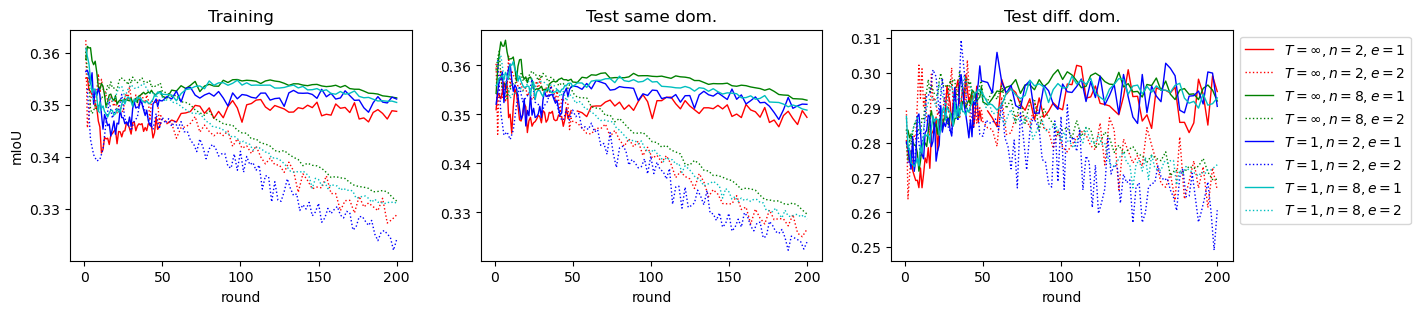

In [189]:
fig,axs=plt.subplots(1,3,figsize=(15,3))
w=1
df_temp=df.loc[:,('inf','2','1')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],linewidth=w,c='r')
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],linewidth=w,c='r')
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],linewidth=w,c='r',label="$T=\infty, n=2,e=1$")
df_temp=df.loc[:,('inf','2','2')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'r:',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'r:',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'r:',linewidth=w,label='$T=\infty, n=2,e=2$')
df_temp=df.loc[:,('inf','8','1')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'g',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'g',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'g',linewidth=w,label='$T=\infty, n=8,e=1$')
df_temp=df.loc[:,('inf','8','2')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'g:',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'g:',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'g:',linewidth=w,label='$T=\infty, n=8,e=2$')
df_temp=df.loc[:,('1','2','1')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'b',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'b',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'b',linewidth=w,label='$T=1, n=2,e=1$')
df_temp=df.loc[:,('1','2','2')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'b:',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'b:',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'b:',linewidth=w,label='$T=1, n=2,e=2$')

df_temp=df.loc[:,('1','8','1')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'c',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'c',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'c',linewidth=w,label='$T=1, n=8,e=1$')
df_temp=df.loc[:,('1','8','2')]
axs[0].plot(df_temp['round'],df_temp['mIoU (train)'],'c:',linewidth=w)
axs[1].plot(df_temp['round'],df_temp['mIoU (test same)'],'c:',linewidth=w)
axs[2].plot(df_temp['round'],df_temp['mIoU (test diff)'],'c:',linewidth=w,label='$T=1, n=8,e=2$')





axs[2].legend(bbox_to_anchor=(1,1))
axs[0].set_ylabel('mIoU')
axs[0].set_title("Training")
axs[1].set_title("Test same dom.")
axs[2].set_title("Test diff. dom.")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")
fig.savefig('Step4_trends',dpi=300,bbox_inches='tight')

In [12]:
import matplotlib.pyplot as plt
import numpy as np
palette=np.array([
    [128,64,128],       #road
    [244,35,232],       #sidewalk
    [70,70,70],         #building
    [102,102,156],      #wall
    [190,153,153],      #fence
    [153,153,153],      #pole
    [250,170,30],       #light
    [220,220,0],        #sign
    [107,142,35],       #vegetation
    [152,251,152],      #terrain
    [70,130,180],       #sky
    [220,20,60],        #person
    [255,0,0],          #rider
    [0,0,142],          #vehicle
    [0,0,230],          #motorcycle
    [119,11,32],        #bycicle
    [0,0,0]] )

In [46]:
from PIL import Image
from matplotlib.colors import ListedColormap
data =np.array(Image.open('data/GTA5/labels/00028.png'))
class_eval = [255, 2, 4, 255, 11, 5, 0, 0, 1, 8, 13, 3, 7, 6, 255, 255, 15, 14, 12, 9, 10]
class_map={
    1: 13,  # ego_vehicle : vehicle
   7: 0,   # road
   8: 1,   # sidewalk
   11: 2,  # building
   12: 3,  # wall
   13: 4,  # fence
   17: 5,  # pole
   18: 5,  # poleGroup: pole
   19: 6,  # traffic light
   20: 7,  # traffic sign
   21: 8,  # vegetation
   22: 9,  # terrain
   23: 10,  # sky
   24: 11,  # person
   25: 12,  # rider
   26: 13,  # car : vehicle
   27: 13,  # truck : vehicle
   28: 13,  # bus : vehicle
   32: 14,  # motorcycle
   33: 15,  # bicycle
}

In [47]:
classes = class_eval
mapping = np.zeros((256,), dtype=np.int64) + 255
for i in range(256):
    mapping[i] = class_map[i] if i in class_map else 255

In [48]:
mapped=mapping[data]
cMap=ListedColormap(palette/256)

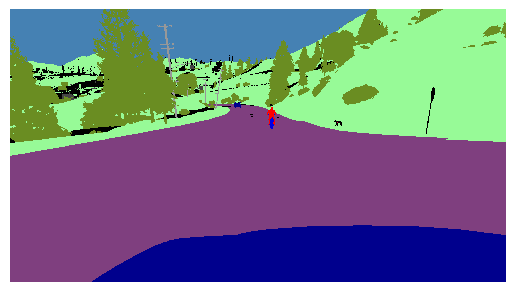

In [49]:
plt.imshow(mapped,vmax=16,cmap=cMap,interpolation='none')
plt.axis('off')
plt.savefig('gta',bbox_inches='tight',pad_inches=0)

In [16]:
src='3_T02_CS_A.jpg'
dst='00028.jpeg'
import utils.ss_transforms as sstr
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

torch.Size([3, 3, 3])
torch.Size([3, 2, 2])
torch.Size([3, 2, 3])
torch.Size([3, 3, 2])


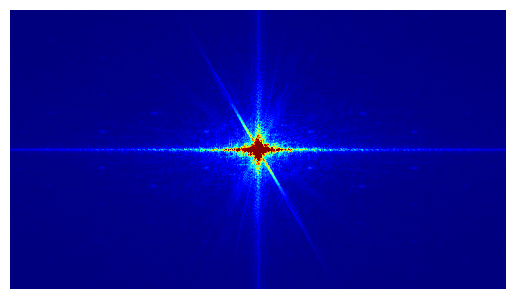

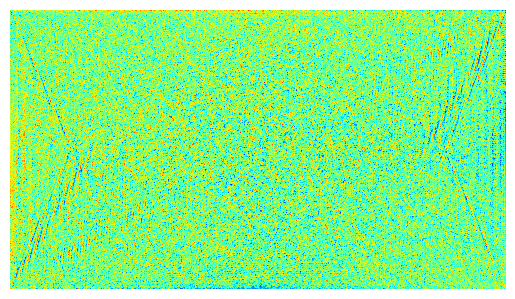

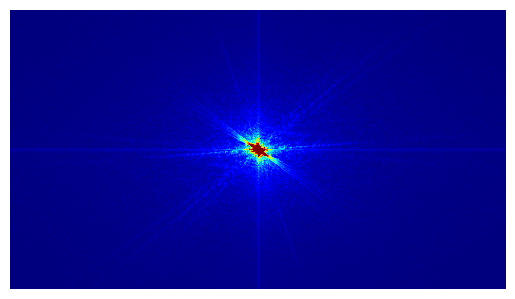

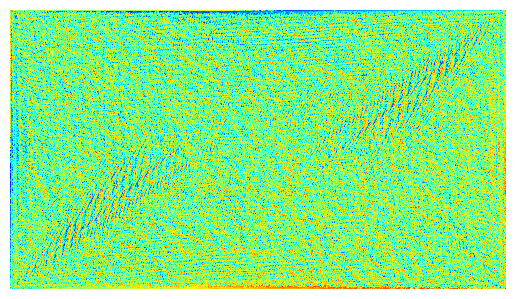

In [31]:
im_src = Image.open('data/idda/images/3_T02_CS_A.jpg')

converter=sstr.Compose([sstr.Resize((540,960)),sstr.ToTensor()])
img=converter(im_src)
im_fft=torch.fft.fft2(img)
im_ampl=im_fft.abs()
centeredRepr=np.zeros(im_ampl[0].shape)
centeredRepr[:270,:480]=im_ampl[0,270:,480:]
centeredRepr[:270,480:]=im_ampl[0,270:,:480]
centeredRepr[270:,:480]=im_ampl[0,:270,480:]
centeredRepr[270:,480:]=im_ampl[0,:270,:480]
plt.figure()
plt.imshow(centeredRepr/centeredRepr.max(),cmap='jet',vmax=0.005)
plt.axis('off')
#plt.savefig('fda_freq_idda',bbox_inches='tight',pad_inches=0)
plt.figure()
plt.imshow(im_fft.angle()[0],cmap='jet')
plt.axis('off')
#plt.savefig('fda_phase_idda',bbox_inches='tight',pad_inches=0)

im_dst=Image.open('data/GTA5/images/00028.png')
img_dst=converter(im_dst)
im_fft_dst=torch.fft.fft2(img_dst)
im_ampl_dst=im_fft_dst.abs()
centeredRepr=np.zeros(im_ampl_dst[0].shape)
centeredRepr[:270,:480]=im_ampl_dst[0,270:,480:]
centeredRepr[:270,480:]=im_ampl_dst[0,270:,:480]
centeredRepr[270:,:480]=im_ampl_dst[0,:270,480:]
centeredRepr[270:,480:]=im_ampl_dst[0,:270,:480]
plt.figure()
plt.imshow(centeredRepr/centeredRepr.max(),cmap='jet',vmax=0.005)
plt.axis('off')
#plt.savefig('fda_freq_idda',bbox_inches='tight',pad_inches=0)
plt.figure()
plt.imshow(im_fft_dst.angle()[0],cmap='jet')
plt.axis('off')
k=5
a=int(k/2)
im_fft_dst[:,:a+1,:a+1]=im_fft[:,:a+1,:a+1]
im_fft_dst[:,-a:,-a:]=im_fft[:,-a:,-a:]
im_fft_dst[:,-a:,:a+1]=im_fft[:,-a:,:a+1]
im_fft_dst[:,:a+1,-a:]=im_fft[:,:a+1,-a:]
